- Chia tỉ lệ train/test 80/20 - random_state = 42 chung cho mọi bạn.
- Sử dụng càng nhiều models càng tốt: Linear regression, logistic regression, decision
tree, neural network, random forest.
- Thử bỏ bớt feature xem Accuracy thay đổi thể nào.
- Đánh giá mô hình bằng các Performance Metrics: Recall, Precision, Accuracy và F1-
score (chưa biết thì google xem định nghĩa của chúng).
- Tận dụng ChatGPT, tư duy đặt câu hỏi cho nó để nhanh chóng tìm được giải pháp.

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (precision_score, recall_score, accuracy_score, 
                             f1_score, confusion_matrix, classification_report, 
                             classification_report, roc_auc_score, roc_curve)
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC



In [6]:
df = pd.read_csv("Data\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [9]:
df.drop(['User ID'], axis=1, inplace=True)

# Explanatory Data Analysis

In [10]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,1.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


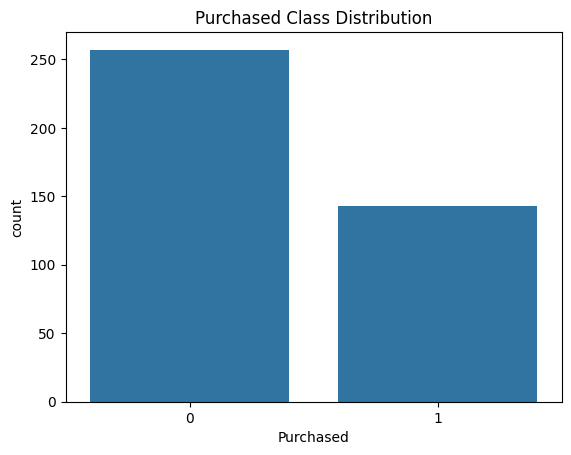

In [11]:
sns.countplot(x='Purchased', data=df)
plt.title('Purchased Class Distribution')
plt.show()

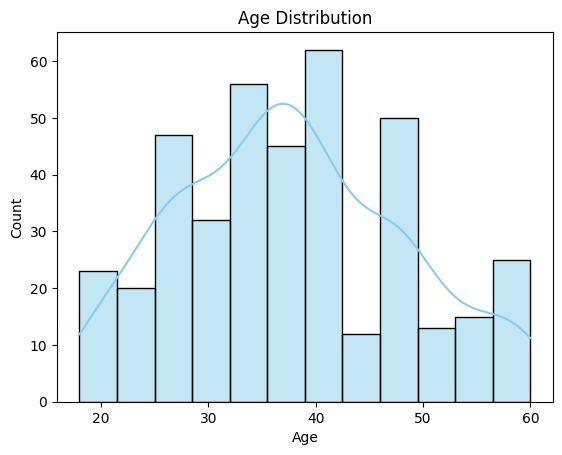

In [12]:
sns.histplot(df['Age'], kde=True, bins=12, color='skyblue')
plt.title('Age Distribution')
plt.show()


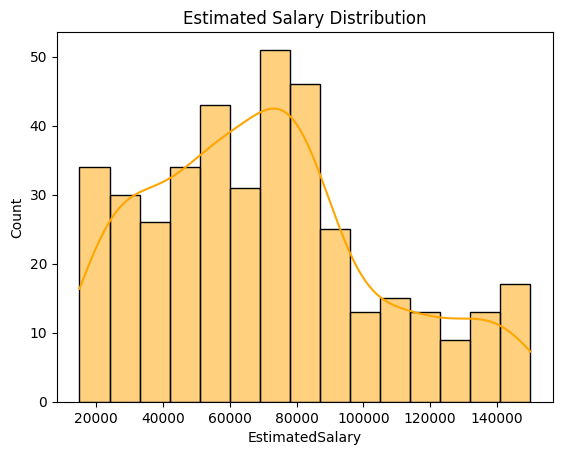

In [13]:
sns.histplot(df['EstimatedSalary'], kde=True, bins=15, color='orange')
plt.title('Estimated Salary Distribution')
plt.show()


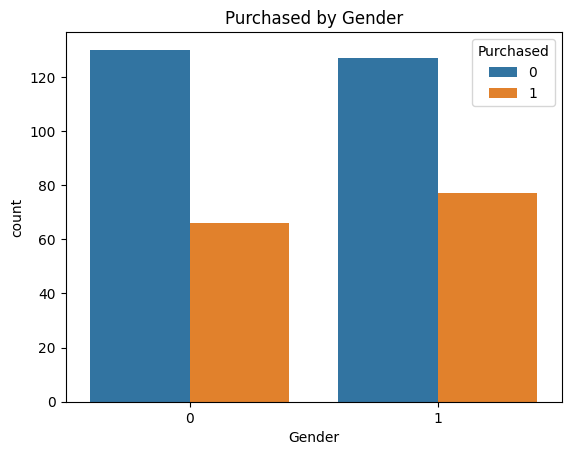

In [14]:
sns.countplot(x='Gender', hue='Purchased', data=df)
plt.title('Purchased by Gender')
plt.show()


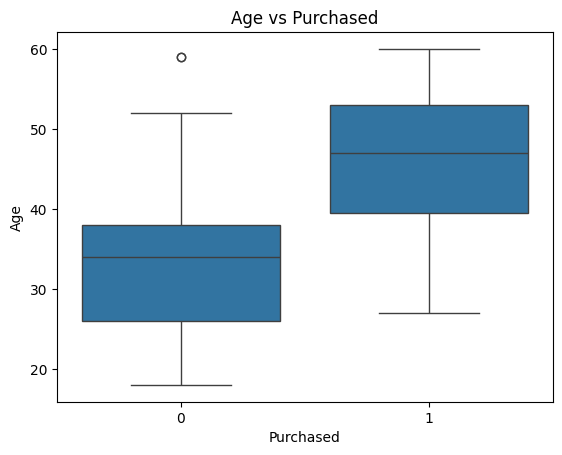

In [15]:
sns.boxplot(x='Purchased', y='Age', data=df)
plt.title('Age vs Purchased')
plt.show()


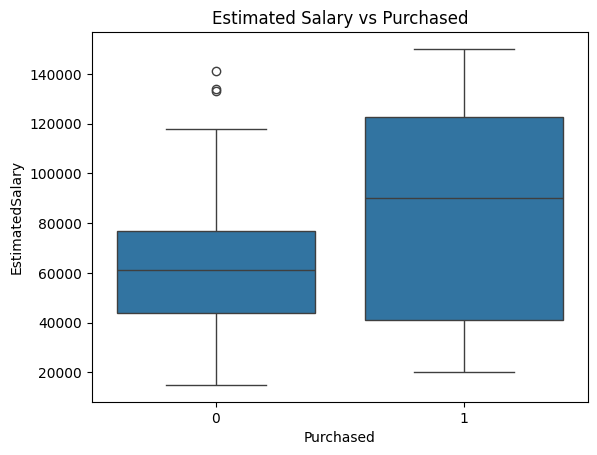

In [16]:
sns.boxplot(x='Purchased', y='EstimatedSalary', data=df)
plt.title('Estimated Salary vs Purchased')
plt.show()


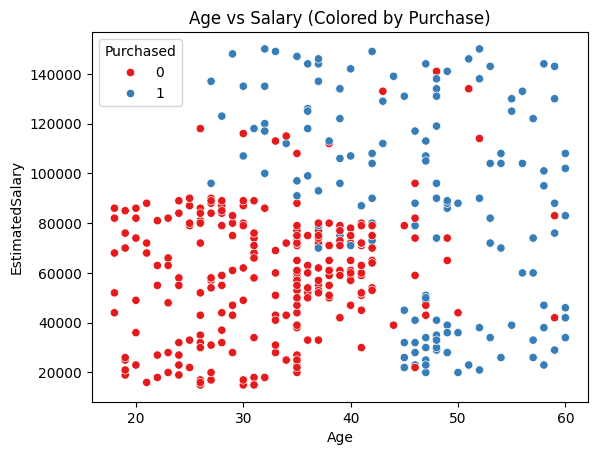

In [17]:
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, palette='Set1')
plt.title('Age vs Salary (Colored by Purchase)')
plt.show()


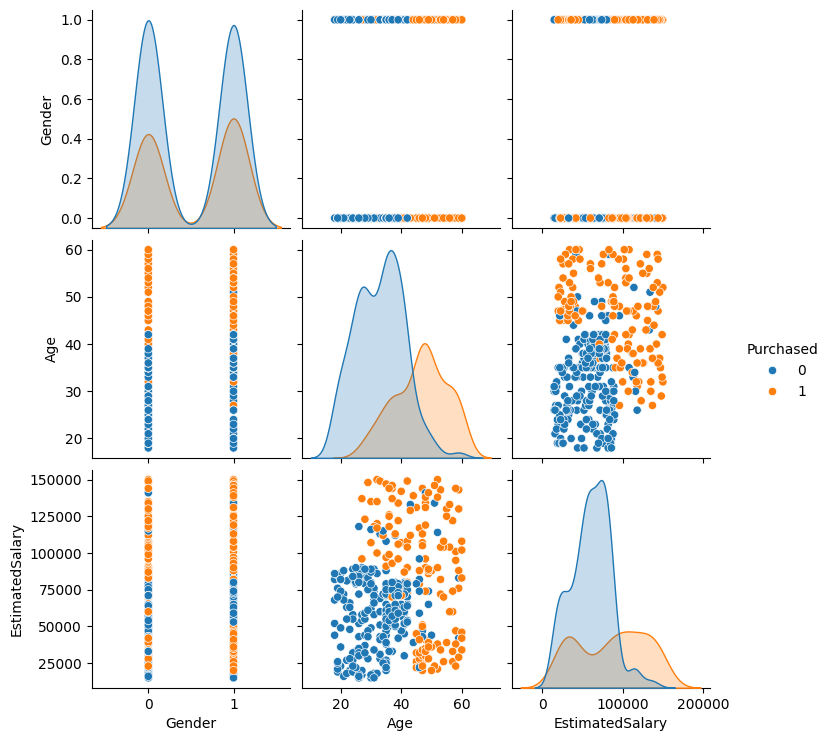

In [18]:
sns.pairplot(df, hue='Purchased')

<Axes: >

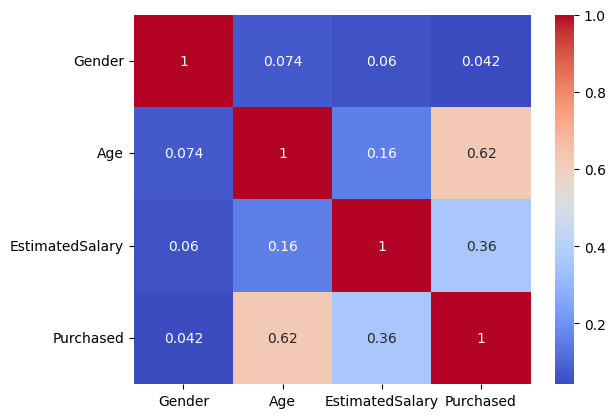

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


**Conclusion from EDA:**
 - Gender does not affect the buying decision (The percentage of buying for both gender is almost the same)
 - The majority who decide not to buy are people under 40 with salary below 100k. The IQR of salary for people who purchase is wider than that of people who don't; this means that not only high income people but also low income, but >50 year old people also decide to purchase 

# Modeling


In [40]:
X = df.drop('Purchased',axis=1)
y = df['Purchased']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


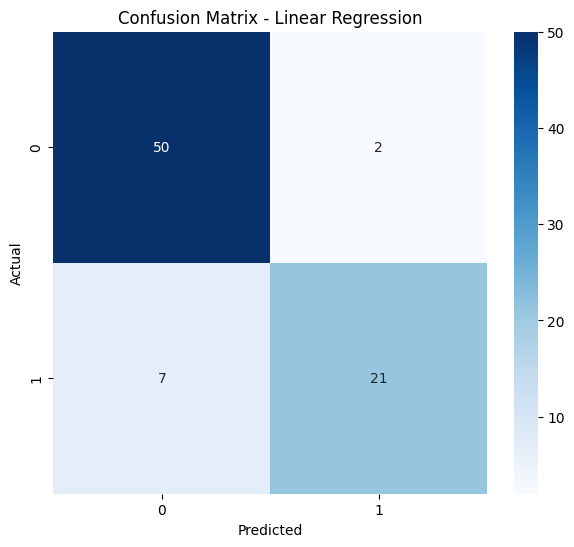


=== Classification Report: Linear Regression ===
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



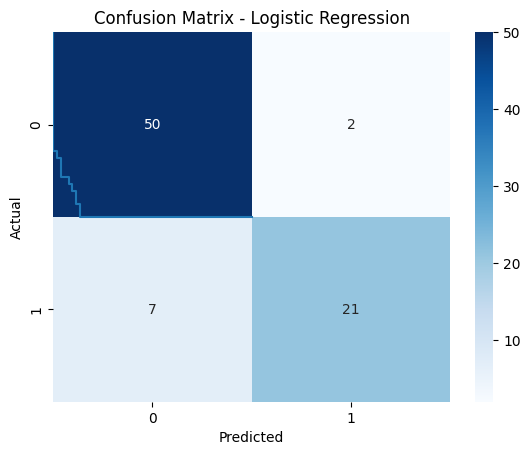


=== Classification Report: Logistic Regression ===
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



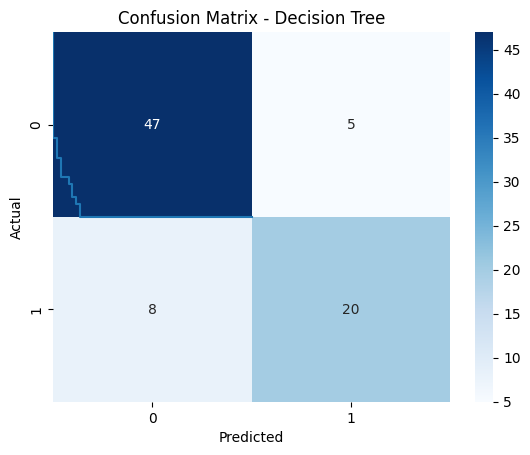


=== Classification Report: Decision Tree ===
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        52
           1       0.80      0.71      0.75        28

    accuracy                           0.84        80
   macro avg       0.83      0.81      0.82        80
weighted avg       0.84      0.84      0.84        80



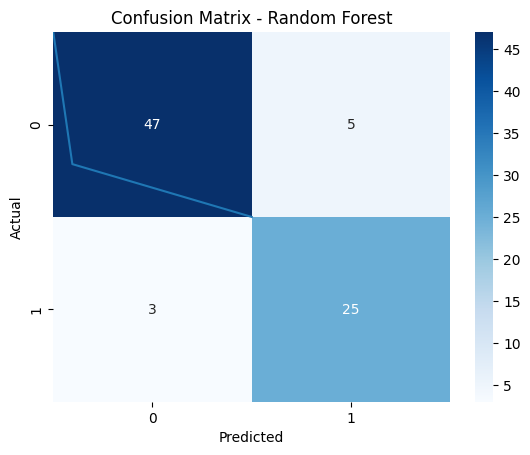


=== Classification Report: Random Forest ===
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        52
           1       0.83      0.89      0.86        28

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



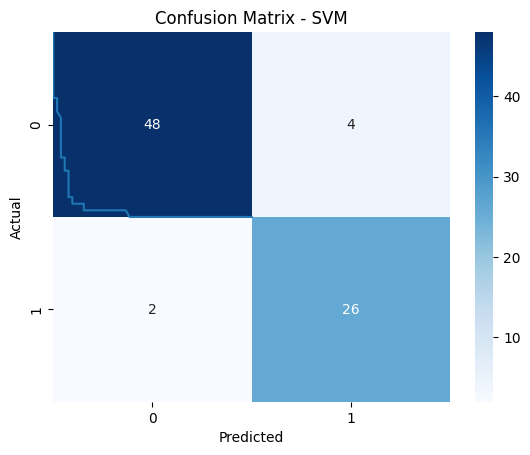


=== Classification Report: SVM ===
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



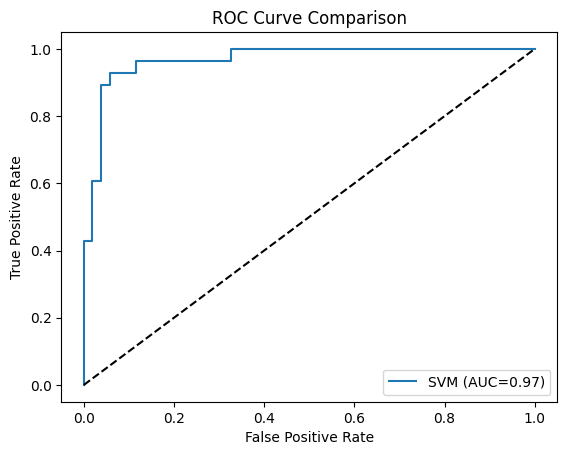


=== Overall Model Comparison ===
                 Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0    Linear Regression    0.8875   0.913043  0.750000  0.823529  0.971154
1  Logistic Regression    0.8875   0.913043  0.750000  0.823529  0.970467
4                  SVM    0.9250   0.866667  0.928571  0.896552  0.967720
3        Random Forest    0.9000   0.833333  0.892857  0.862069  0.951923
2        Decision Tree    0.8375   0.800000  0.714286  0.754717  0.809066


C:\Users\ACER\AppData\Local\Temp\ipykernel_7160\1984659898.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROC-AUC', y='Model', data=results_df, palette='mako')


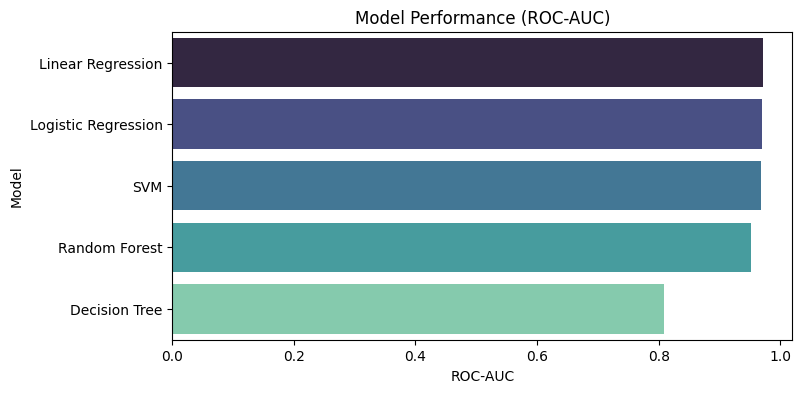

In [42]:
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# --- Evaluate each model ---
results = []
plt.figure(figsize=(7, 6))

for name, model in models.items():
    if name in ["Linear Regression", "Logistic Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = (
            model.predict_proba(X_test_scaled)[:, 1]
            if hasattr(model, "predict_proba")
            else model.predict(X_test_scaled)
        )
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

    # Convert regression outputs to binary
    if name == "Linear Regression":
        y_pred = (y_pred >= 0.5).astype(int)

    # --- Metrics ---
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "ROC-AUC": auc
    })

    # --- Confusion Matrix Plot ---
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # --- Classification Report ---
    print(f"\n=== Classification Report: {name} ===")
    print(classification_report(y_test, y_pred))

    # --- ROC Curve ---
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.2f})')

# --- ROC Curve Comparison ---
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# --- Display Results Summary ---
results_df = pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False)
print("\n=== Overall Model Comparison ===")
print(results_df)

# --- Visualize summary ---
plt.figure(figsize=(8, 4))
sns.barplot(x='ROC-AUC', y='Model', data=results_df, palette='mako')
plt.title('Model Performance (ROC-AUC)')
plt.show()


# Remove feature
Given gender have lowest correlation with Purchased, we will remove the feature to test if performance increases

In [43]:
X = df.drop(['Purchased','Gender'],axis=1)
y = df['Purchased']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


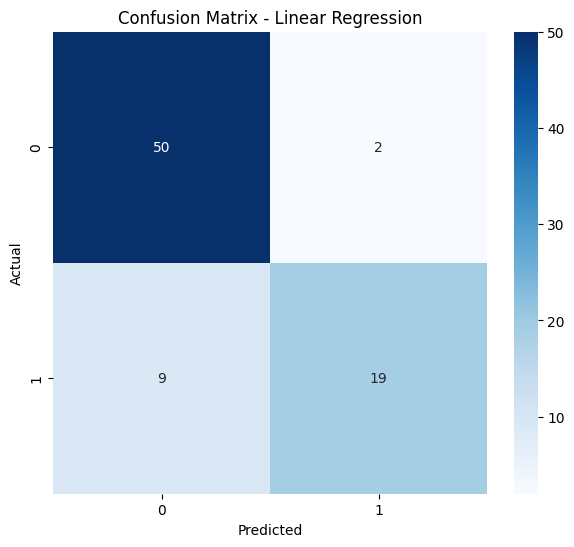


=== Classification Report: Linear Regression ===
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



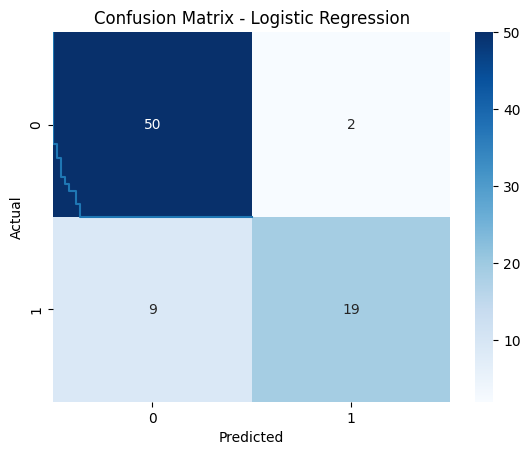


=== Classification Report: Logistic Regression ===
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



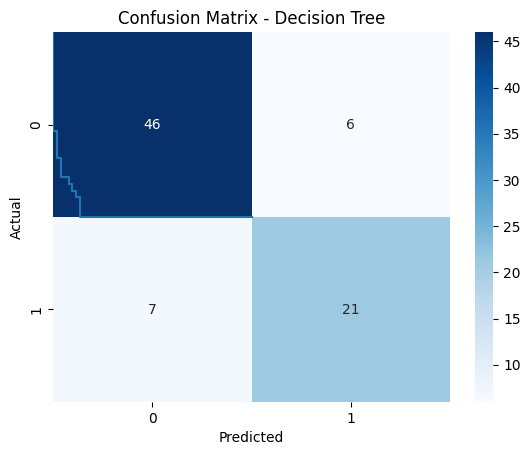


=== Classification Report: Decision Tree ===
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        52
           1       0.78      0.75      0.76        28

    accuracy                           0.84        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80



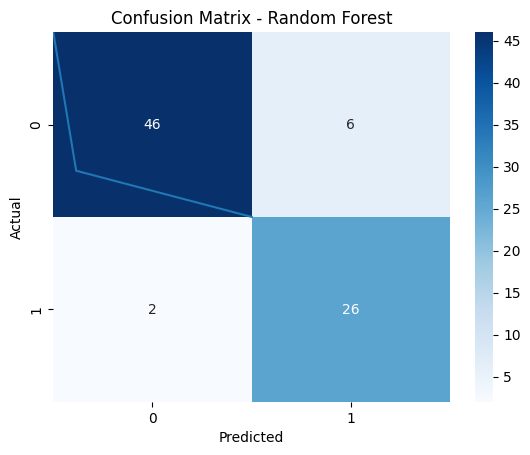


=== Classification Report: Random Forest ===
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.81      0.93      0.87        28

    accuracy                           0.90        80
   macro avg       0.89      0.91      0.89        80
weighted avg       0.91      0.90      0.90        80



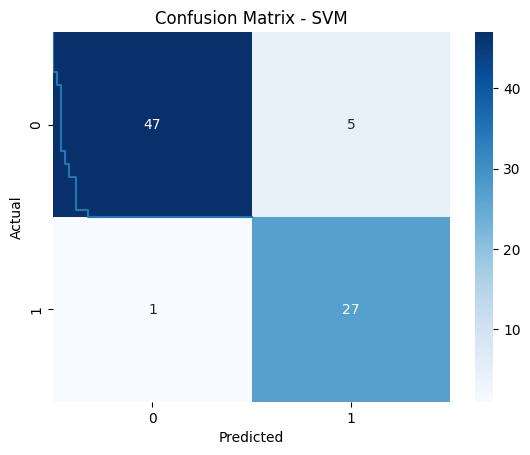


=== Classification Report: SVM ===
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        52
           1       0.84      0.96      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



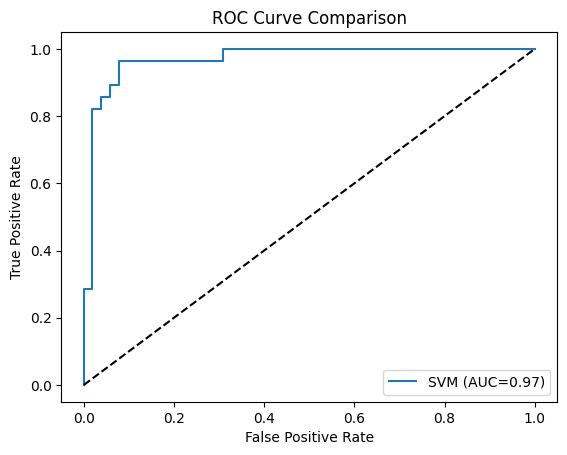


=== Overall Model Comparison ===
                 Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0    Linear Regression    0.8625   0.904762  0.678571  0.775510  0.971841
4                  SVM    0.9250   0.843750  0.964286  0.900000  0.969780
1  Logistic Regression    0.8625   0.904762  0.678571  0.775510  0.968407
3        Random Forest    0.9000   0.812500  0.928571  0.866667  0.948489
2        Decision Tree    0.8375   0.777778  0.750000  0.763636  0.817308


C:\Users\ACER\AppData\Local\Temp\ipykernel_7160\849386370.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROC-AUC', y='Model', data=results_df2, palette='mako')


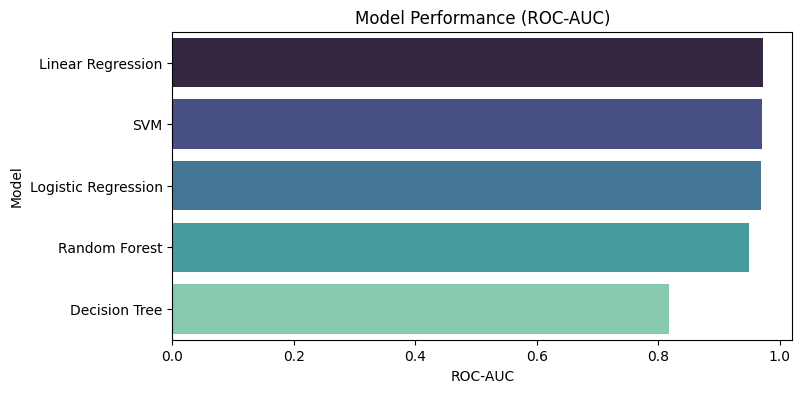

In [44]:
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# --- Evaluate each model ---
results2 = []
plt.figure(figsize=(7, 6))

for name, model in models.items():
    if name in ["Linear Regression", "Logistic Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = (
            model.predict_proba(X_test_scaled)[:, 1]
            if hasattr(model, "predict_proba")
            else model.predict(X_test_scaled)
        )
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

    # Convert regression outputs to binary
    if name == "Linear Regression":
        y_pred = (y_pred >= 0.5).astype(int)

    # --- Metrics ---
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)

    results2.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "ROC-AUC": auc
    })

    # --- Confusion Matrix Plot ---
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # --- Classification Report ---
    print(f"\n=== Classification Report: {name} ===")
    print(classification_report(y_test, y_pred))

    # --- ROC Curve ---
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.2f})')

# --- ROC Curve Comparison ---
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# --- Display Results Summary ---
results_df2 = pd.DataFrame(results2).sort_values(by='ROC-AUC', ascending=False)
print("\n=== Overall Model Comparison ===")
print(results_df2)

# --- Visualize summary ---
plt.figure(figsize=(8, 4))
sns.barplot(x='ROC-AUC', y='Model', data=results_df2, palette='mako')
plt.title('Model Performance (ROC-AUC)')
plt.show()


In [49]:
results_df2.Model = results_df2.Model.map(lambda x: x + '_remove_gender')

In [ ]:
final = pd.concat([results_df,results_df2])
final.set_index('Model',inplace=True)

In [55]:
final.diff(5)

,Accuracy,Precision,Recall,F1-score,ROC-AUC
Model,,,,,
Linear Regression,NaN,NaN,NaN,NaN,NaN
Logistic Regression,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN
Decision Tree,NaN,NaN,NaN,NaN,NaN
Linear Regression_remove_gender,-0.0250,-0.008282,-0.071429,-0.048019,0.000687
SVM_remove_gender,0.0375,-0.069293,0.214286,0.076471,-0.000687
Logistic Regression_remove_gender,-0.0625,0.038095,-0.250000,-0.121042,0.000687
Random Forest_remove_gender,0.0000,-0.020833,0.035714,0.004598,-0.003434


**Conclusion**: Removing the Gender feature generally decrease the performance of the models. However, the change in metrics is minute. Thus removing the mentioned feature would yield simpler models while compromising little decrease in predicting power